In [244]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [189]:
xt = pd.read_csv('../dataset/X_test.csv',encoding='euc-kr')
xt['gender'] = np.random.choice(['남','여','여'],len(xt))

In [212]:
idx = (xt['총구매액']<0) | (xt['최대구매액']<0) | (xt['내점일수']<0)
xt = xt.drop(xt.index[idx])

In [213]:
##### 내점당구매건수 범주화 #####
def get_count(x):
    cat=''
    if x<=2.4: cat='적음'
    elif x<=4: cat='중간'
    elif x<=10: cat='많음'
    else: cat='매우 많음'
    return cat

xt['내점당구매건수_cat']=xt.내점당구매건수.apply(lambda x: get_count(x))

In [214]:
##### 주말방문비율 범주화 #####
def get_count(x):
    cat=''
    if x<=0.25: cat='적음'
    elif x<=0.4: cat='중간'
    elif x<=0.7: cat='많음'
    else: cat='매우 많음'
    return cat

xt['주말방문빈도_cat']=xt.주말방문비율.apply(lambda x: get_count(x))

In [216]:
xt['구매건수'] = xt['내점일수']*xt['내점당구매건수']
xt['내점당구매액'] = (xt['총구매액']/xt['구매건수']) * xt['내점당구매건수']

xt[['구매건수','총구매액','내점당구매액']] = xt[['구매건수','총구매액','내점당구매액']].astype('int')

In [240]:
xt.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender,내점당구매건수_cat,주말방문빈도_cat,구매건수,내점당구매액
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26,여,적음,매우 많음,19,5453876
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3,남,중간,중간,218,3450367
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3,여,매우 많음,적음,1477,3022417
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47,여,적음,적음,10,1518816
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8,여,중간,적음,8,598596


## seaborn

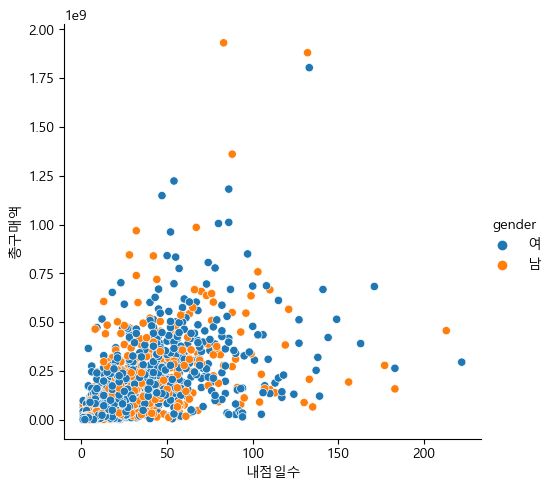

In [217]:
# relplot: 두 변수 간의 관계를 시각화하는 그래프
sns.relplot(data=xt, x='내점일수',y='총구매액', hue='gender')

<AxesSubplot:xlabel='주말방문비율', ylabel='총구매액'>

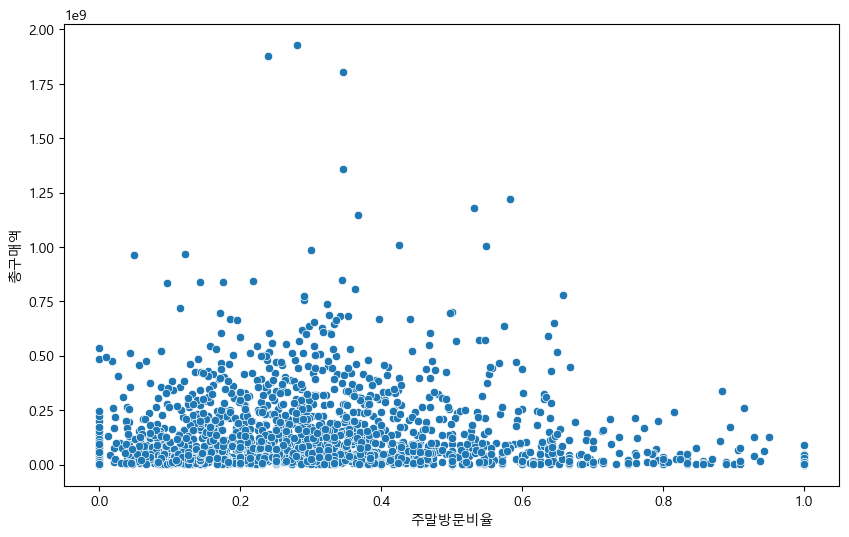

In [218]:
# scatterplot: 산점도 그래프
plt.figure(figsize=(10,6))
sns.scatterplot(x='주말방문비율', y='총구매액', data=xt)

<AxesSubplot:xlabel='내점일수', ylabel='구매주기'>

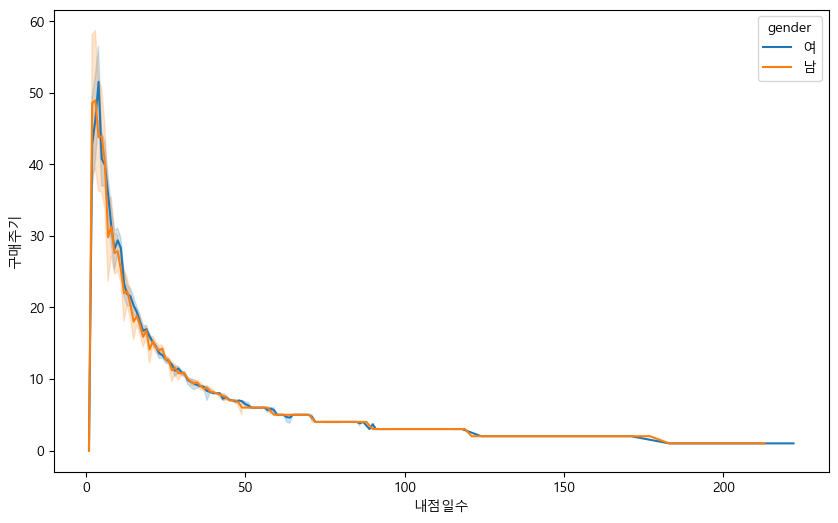

In [219]:
# lineplot: 선 그래프
plt.figure(figsize=(10,6))
sns.lineplot(x='내점일수',y='구매주기', hue='gender', data=xt)

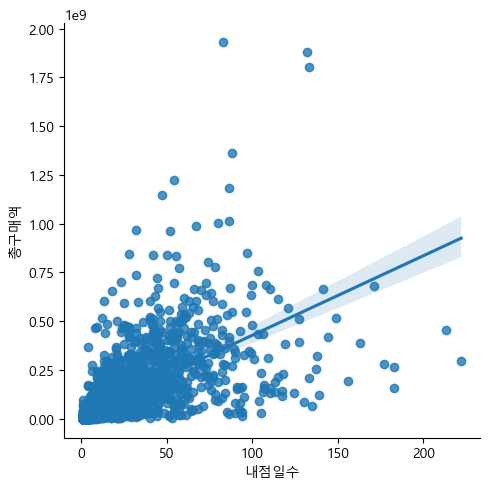

In [220]:
# lmplot: 산점도 +회귀선 그래프
sns.lmplot(data=xt, x='내점일수',y='총구매액')

<AxesSubplot:xlabel='내점일수', ylabel='총구매액'>

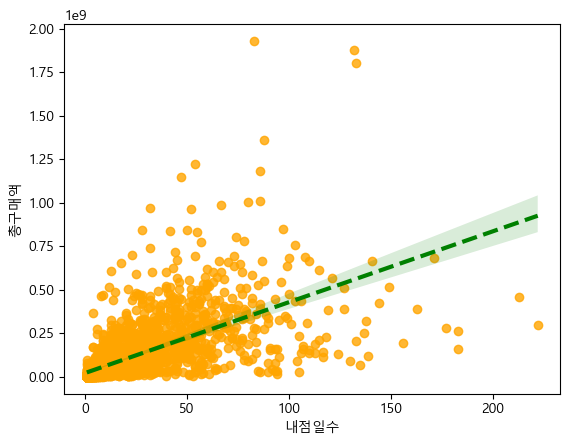

In [221]:
# regplot: 산점도 +회귀선 그래프
sns.regplot(data=xt, x='내점일수',y='총구매액', color='orange', line_kws={'color':'green', 'linewidth':3,'linestyle':'--'})

<AxesSubplot:xlabel='총구매액', ylabel='Count'>

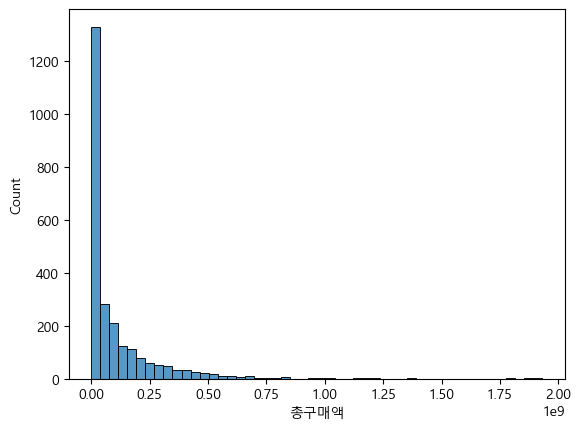

In [222]:
# histplot: 히스토그램 그래프
sns.histplot(xt.총구매액, bins=50)

<AxesSubplot:xlabel='총구매액', ylabel='Density'>

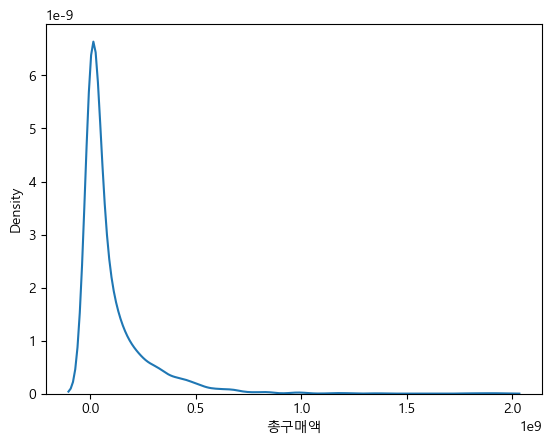

In [223]:
# kdeplot: 밀도 그래프
sns.kdeplot(data=xt,x='총구매액')

<AxesSubplot:xlabel='gender', ylabel='주말방문비율'>

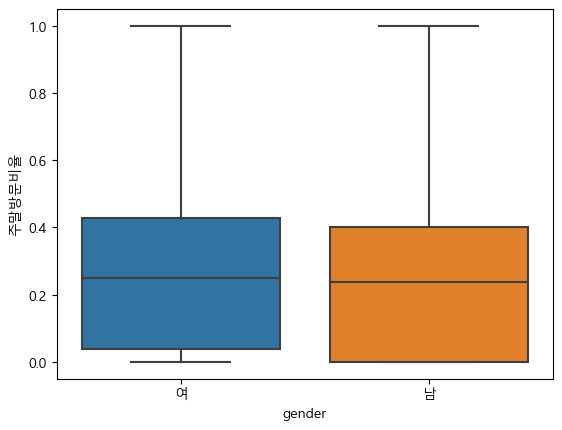

In [224]:
# boxplot: 박스 그래프
sns.boxplot(x='gender',y='주말방문비율',data=xt)

<AxesSubplot:xlabel='gender', ylabel='주말방문비율'>

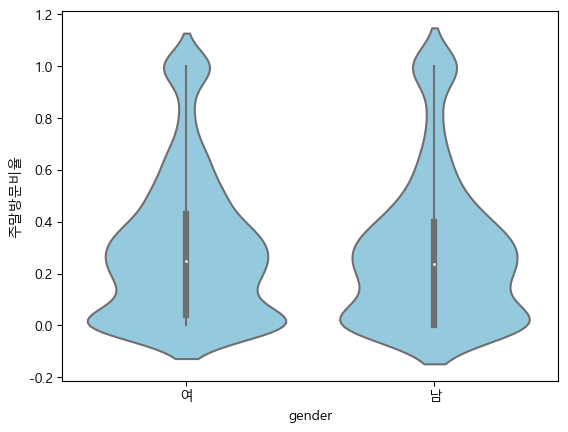

In [225]:
# violinplot: 바이올린 그래프
sns.violinplot(x='gender',y='주말방문비율',data=xt, color='skyblue')

<AxesSubplot:xlabel='주말방문빈도_cat', ylabel='총구매액'>

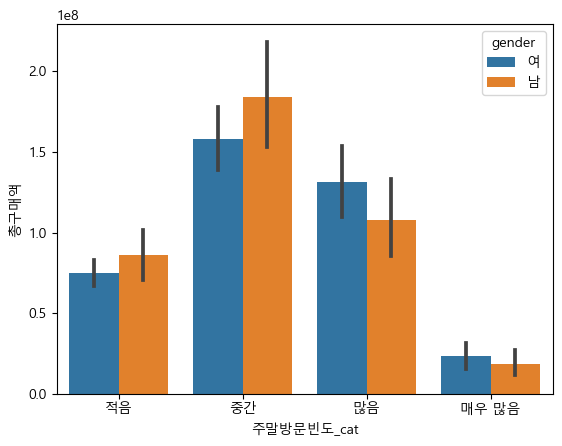

In [226]:
# barplot: 막대 그래프
sns.barplot(x='주말방문빈도_cat',y='총구매액',hue='gender',data=xt, order=['적음','중간','많음', '매우 많음'])

<AxesSubplot:xlabel='주구매지점', ylabel='count'>

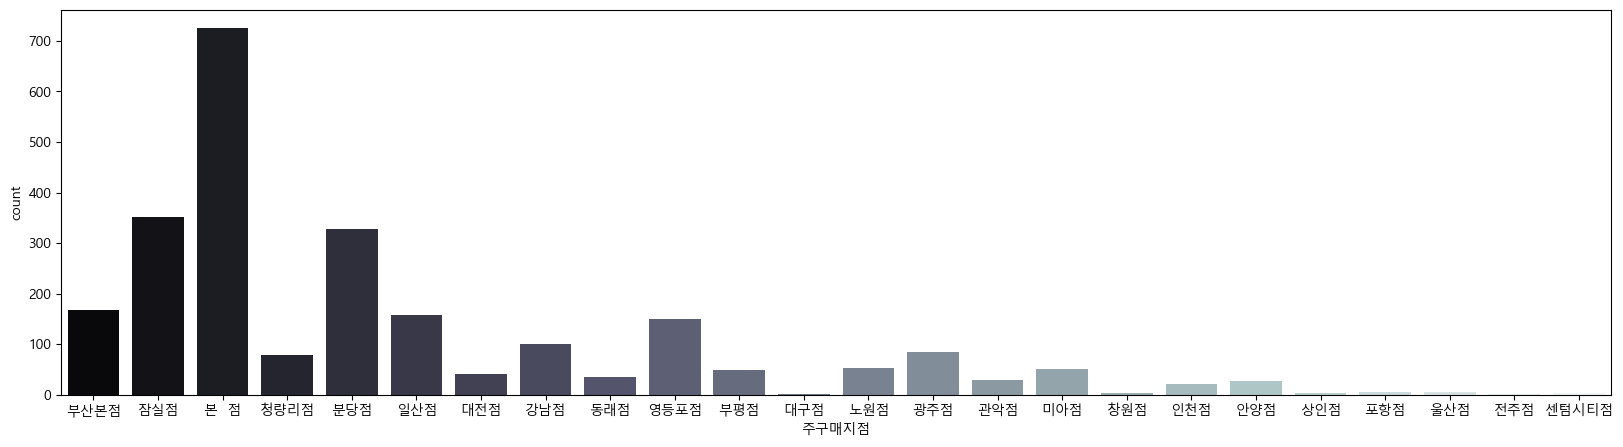

In [227]:
# countplot: 빈도수 그래프
plt.figure(figsize=(20,5))
sns.countplot(x='주구매지점', data=xt, palette='bone')

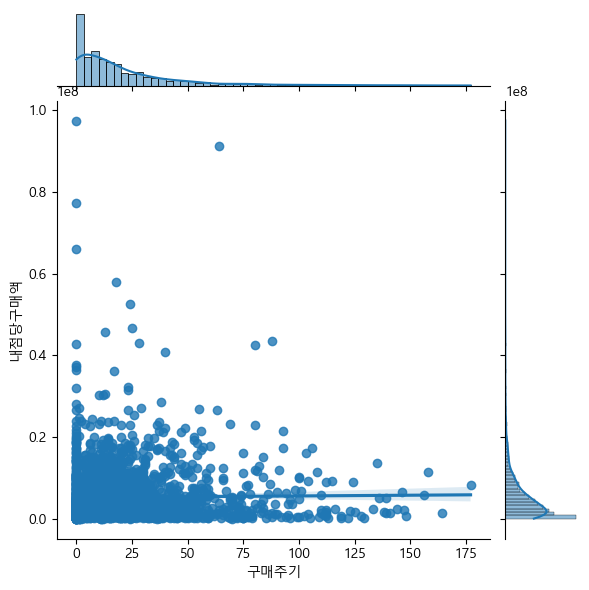

In [228]:
# jointplot: 멀티 그래프
sns.jointplot(data=xt, x='구매주기',y='내점당구매액',kind='reg')

<AxesSubplot:xlabel='None-내점당구매건수_cat', ylabel='gender'>

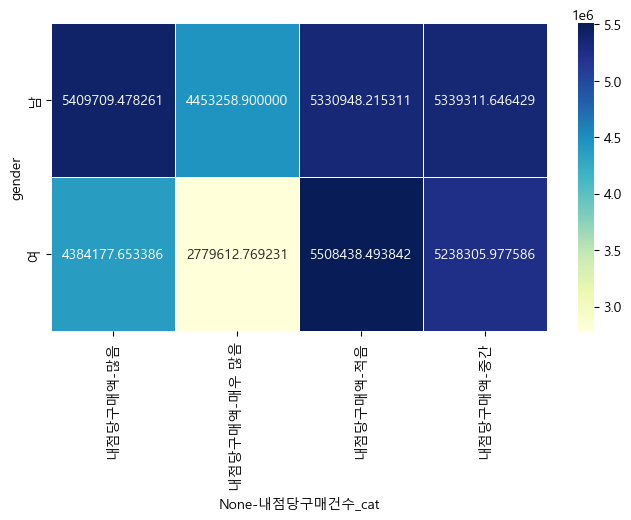

In [243]:
# heatmap: 히트맵
table = xt.pivot_table(index=['gender'],columns=['내점당구매건수_cat'],values=['내점당구매액'],aggfunc='mean')
table

plt.figure(figsize=(8,4))
sns.heatmap(table, annot=True, fmt='f', cmap='YlGnBu', linewidth=.5, cbar=True)

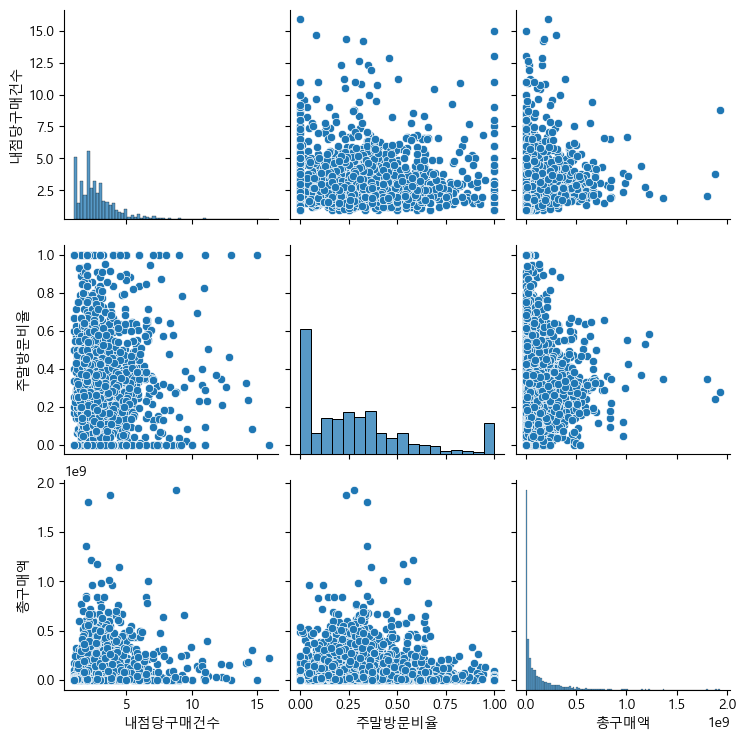

In [233]:
# pairplot: 다변량 그래프
sns.pairplot(xt[['내점당구매건수','주말방문비율','총구매액']])